In [37]:
import pandas as pd
import matplotlib.pyplot as plot
import sklearn.preprocessing as sk

In [38]:
file_path = 'StudentsPerformance_modified.csv'
data = pd.read_csv(file_path)

In [39]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [40]:
#checking for missing values
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [41]:
#describing the data using some statistics
data.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [43]:
data.shape

(1000, 8)

In [44]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [45]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [46]:
#data formatting
data['lunch'] = data['lunch'].astype('category')
data['gender']=data['gender'].astype('category')
data['race/ethnicity']=data['race/ethnicity'].astype('category')
data['test preparation course']=data['test preparation course'].astype('category')
data.dtypes

gender                         category
race/ethnicity                 category
parental level of education      object
lunch                          category
test preparation course        category
math score                       object
reading score                   float64
writing score                   float64
dtype: object

In [47]:
data.dtypes

gender                         category
race/ethnicity                 category
parental level of education      object
lunch                          category
test preparation course        category
math score                       object
reading score                   float64
writing score                   float64
dtype: object

In [48]:
#converting data type to numeric from object
data['math score']=pd.to_numeric(data['math score'],errors='coerce')
data.dtypes

gender                         category
race/ethnicity                 category
parental level of education      object
lunch                          category
test preparation course        category
math score                      float64
reading score                   float64
writing score                   float64
dtype: object

In [49]:
#maximum absolute scaling normalization
#c=c/c.abs().max()
datamaxscaled = data.copy()
datamaxscaled['math score']=datamaxscaled['math score']/datamaxscaled['math score'].abs().max()
datamaxscaled['reading score']=datamaxscaled['reading score']/datamaxscaled['reading score'].abs().max()
datamaxscaled['writing score']=datamaxscaled['writing score']/datamaxscaled['writing score'].abs().max()
display(datamaxscaled)



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.215569,0.72,0.130511
1,female,group C,some college,standard,completed,0.206587,0.90,0.155203
2,female,group B,master's degree,standard,none,0.269461,0.95,0.164021
3,male,group A,associate's degree,free/reduced,none,0.140719,0.57,0.077601
4,male,group C,some college,standard,none,0.227545,0.78,0.132275
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.263473,0.99,0.167549
996,male,group C,high school,free/reduced,none,0.185629,0.55,0.097002
997,female,group C,high school,free/reduced,completed,0.176647,0.71,0.114638
998,female,group D,some college,standard,completed,0.203593,0.78,0.135802


<Axes: >

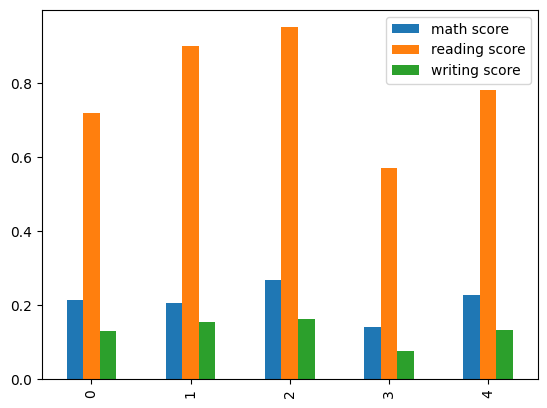

In [50]:
datamaxscaled.head(5).plot(kind = 'bar')

In [51]:
#the min-max feauture scaling
#c=(c-c.min())/(c.max()-c.min())
dataminmaxscl = data.copy()
dataminmaxscl['math score']= (dataminmaxscl['math score']-dataminmaxscl['math score'].min())/(dataminmaxscl['math score'].max()-dataminmaxscl['math score'].min())
dataminmaxscl['reading score']= (dataminmaxscl['reading score']-dataminmaxscl['reading score'].min())/(dataminmaxscl['reading score'].max()-dataminmaxscl['reading score'].min())
dataminmaxscl['writing score']= (dataminmaxscl['writing score']-dataminmaxscl['writing score'].min())/(dataminmaxscl['writing score'].max()-dataminmaxscl['writing score'].min())
display(dataminmaxscl)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,0.711340,0.114901
1,female,group C,some college,standard,completed,0.373522,0.896907,0.140036
2,female,group B,master's degree,standard,none,0.423168,0.948454,0.149013
3,male,group A,associate's degree,free/reduced,none,0.321513,0.556701,0.061041
4,male,group C,some college,standard,none,0.390071,0.773196,0.116697
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.418440,0.989691,0.152603
996,male,group C,high school,free/reduced,none,0.356974,0.536082,0.080790
997,female,group C,high school,free/reduced,completed,0.349882,0.701031,0.098743
998,female,group D,some college,standard,completed,0.371158,0.773196,0.120287


<Axes: >

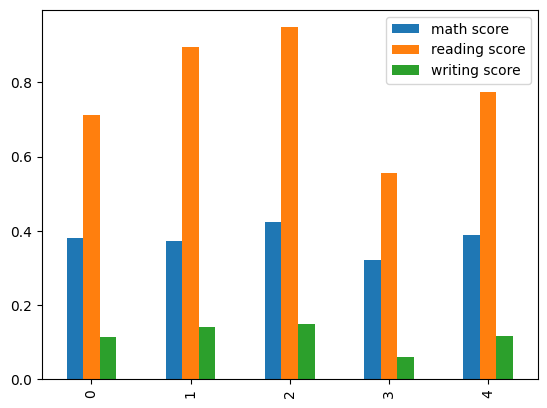

In [52]:
dataminmaxscl.head(5).plot(kind='bar')

In [53]:
#normalization using z score
#c=(c-c.mean())/c.std()
datazscaled = data.copy()
datazscaled['math score'] = (datazscaled['math score']-datazscaled['math score'].mean())/datazscaled['math score'].std()
datazscaled['reading score'] = (datazscaled['reading score']-datazscaled['reading score'].mean())/datazscaled['reading score'].std()
datazscaled['writing score'] = (datazscaled['writing score']-datazscaled['writing score'].mean())/datazscaled['writing score'].std()
display(datazscaled)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.310505,0.240446,0.152640
1,female,group C,some college,standard,completed,0.146392,1.324635,0.626193
2,female,group B,master's degree,standard,none,1.295181,1.625799,0.795319
3,male,group A,associate's degree,free/reduced,none,-1.057101,-0.663045,-0.862116
4,male,group C,some college,standard,none,0.529322,0.601842,0.186465
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.185773,1.866730,0.862969
996,male,group C,high school,free/reduced,none,-0.236537,-0.783510,-0.490039
997,female,group C,high school,free/reduced,completed,-0.400650,0.180213,-0.151787
998,female,group D,some college,standard,completed,0.091688,0.601842,0.254116


<Axes: >

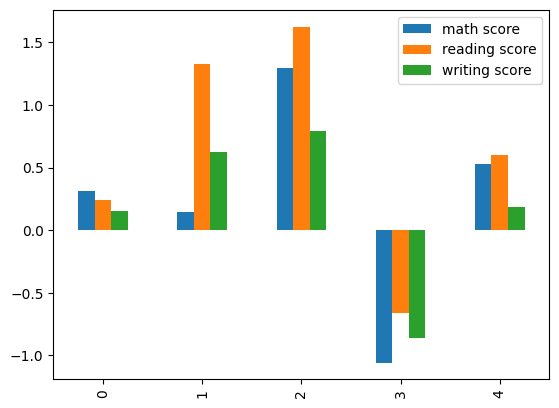

In [54]:
datazscaled.head(5).plot(kind = 'bar')

In [55]:
# One hot encoding
lunch_encoding =pd.get_dummies(data, columns=['lunch'])
display(lunch_encoding)


,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,lunch_free/reduced,lunch_standard
0,female,group B,bachelor's degree,none,72.0,72.0,74.0,0,1
1,female,group C,some college,completed,69.0,90.0,88.0,0,1
2,female,group B,master's degree,none,90.0,95.0,93.0,0,1
3,male,group A,associate's degree,none,47.0,57.0,44.0,1,0
4,male,group C,some college,none,76.0,78.0,75.0,0,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88.0,99.0,95.0,0,1
996,male,group C,high school,none,62.0,55.0,55.0,1,0
997,female,group C,high school,completed,59.0,71.0,65.0,1,0
998,female,group D,some college,completed,68.0,78.0,77.0,0,1


In [56]:
#One hot encoding
gender_encoding = pd.get_dummies(data,columns=['gender'])
display(gender_encoding)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72.0,72.0,74.0,1,0
1,group C,some college,standard,completed,69.0,90.0,88.0,1,0
2,group B,master's degree,standard,none,90.0,95.0,93.0,1,0
3,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0,1
4,group C,some college,standard,none,76.0,78.0,75.0,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88.0,99.0,95.0,1,0
996,group C,high school,free/reduced,none,62.0,55.0,55.0,0,1
997,group C,high school,free/reduced,completed,59.0,71.0,65.0,1,0
998,group D,some college,standard,completed,68.0,78.0,77.0,1,0


In [57]:
#One hot encoding
race_encoding=pd.get_dummies(data, columns=['race/ethnicity'])
display(race_encoding)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,bachelor's degree,standard,none,72.0,72.0,74.0,0,1,0,0,0
1,female,some college,standard,completed,69.0,90.0,88.0,0,0,1,0,0
2,female,master's degree,standard,none,90.0,95.0,93.0,0,1,0,0,0
3,male,associate's degree,free/reduced,none,47.0,57.0,44.0,1,0,0,0,0
4,male,some college,standard,none,76.0,78.0,75.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88.0,99.0,95.0,0,0,0,0,1
996,male,high school,free/reduced,none,62.0,55.0,55.0,0,0,1,0,0
997,female,high school,free/reduced,completed,59.0,71.0,65.0,0,0,1,0,0
998,female,some college,standard,completed,68.0,78.0,77.0,0,0,0,1,0


In [58]:
#one hot encoding
testcourse_encoding=pd.get_dummies(data, columns=['test preparation course'])
display(testcourse_encoding)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,test preparation course_completed,test preparation course_none
0,female,group B,bachelor's degree,standard,72.0,72.0,74.0,0,1
1,female,group C,some college,standard,69.0,90.0,88.0,1,0
2,female,group B,master's degree,standard,90.0,95.0,93.0,0,1
3,male,group A,associate's degree,free/reduced,47.0,57.0,44.0,0,1
4,male,group C,some college,standard,76.0,78.0,75.0,0,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88.0,99.0,95.0,1,0
996,male,group C,high school,free/reduced,62.0,55.0,55.0,0,1
997,female,group C,high school,free/reduced,59.0,71.0,65.0,1,0
998,female,group D,some college,standard,68.0,78.0,77.0,1,0


In [59]:
data['race/ethnicity'].unique()
#gives the categories

['group B', 'group C', 'group A', 'group D', 'group E']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']

In [60]:
#label encoding
encoder = sk.LabelEncoder()
data['race/ethnicity encoding']= encoder.fit_transform(data['race/ethnicity'])
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity encoding
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,1
1,female,group C,some college,standard,completed,69.0,90.0,88.0,2
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,1
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0
4,male,group C,some college,standard,none,76.0,78.0,75.0,2
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,4
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,2
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,2
998,female,group D,some college,standard,completed,68.0,78.0,77.0,3


In [61]:
data['parental level of education'] = data['parental level of education'].astype('category')
data.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                      float64
reading score                   float64
writing score                   float64
race/ethnicity encoding           int64
dtype: object

In [34]:
data['parental level of education'].unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree',
                         'some college', 'some high school']

In [63]:
#Ordinal encoding
priority_map = {"some high school":1,"high school":2,"some college":3,"associate's degree":4,"bachelor's degree":5,"master's degree":6}
data["parental level of education encoded"]= data["parental level of education"].replace(priority_map)
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity encoding,parental level of education encoded
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,1,5
1,female,group C,some college,standard,completed,69.0,90.0,88.0,2,3
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,1,6
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0,4
4,male,group C,some college,standard,none,76.0,78.0,75.0,2,3
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,4,6
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,2,2
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,2,2
998,female,group D,some college,standard,completed,68.0,78.0,77.0,3,3
